In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from __future__ import division, print_function, unicode_literals
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Data Pre-Processing

In [3]:
phish = pd.read_csv('/content/drive/MyDrive/Information Assurance/phishing_data.csv')
phish = phish.set_index('url')
phish = phish.dropna()
phish.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
url,,,,,,,,,,,,,,,,,,,,,
http://www.progarchives.com/album.asp?id=61737,46,20,zero,3,zero,0,1,0,0,1,...,1,one,0,627,6678,78526,0,0,5,phishing
http://signin.eday.co.uk.ws.edayisapi.dllsign.inusingsslpuseridcopartnerid2siteid.zdfxx949xyss1pnbh0soabfdzgdh2kppnu.reippl.com/,128,120,0,10,0,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
http://www.avevaconstruction.com/blesstool/image.htm,52,25,0,3,0,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
http://www.jp519.com/,21,13,0,2,0,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate


In [4]:
phish.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11481 entries, http://www.progarchives.com/album.asp?id=61737 to http://y9o5m.codesandbox.io/onedrive.html
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11481 non-null  int64  
 1   length_hostname             11481 non-null  int64  
 2   ip                          11481 non-null  object 
 3   nb_dots                     11481 non-null  int64  
 4   nb_hyphens                  11481 non-null  object 
 5   nb_at                       11481 non-null  int64  
 6   nb_qm                       11481 non-null  int64  
 7   nb_and                      11481 non-null  int64  
 8   nb_or                       11481 non-null  int64  
 9   nb_eq                       11481 non-null  int64  
 10  nb_underscore               11481 non-null  int64  
 11  nb_tilde                    11481 non-null  int64  
 12  nb_percent  

In [5]:
phish = phish.replace('zero', 0)
phish = phish.replace('one', 1)
phish.info()
phish.head()

<class 'pandas.core.frame.DataFrame'>
Index: 11481 entries, http://www.progarchives.com/album.asp?id=61737 to http://y9o5m.codesandbox.io/onedrive.html
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11481 non-null  int64  
 1   length_hostname             11481 non-null  int64  
 2   ip                          11481 non-null  object 
 3   nb_dots                     11481 non-null  int64  
 4   nb_hyphens                  11481 non-null  object 
 5   nb_at                       11481 non-null  int64  
 6   nb_qm                       11481 non-null  int64  
 7   nb_and                      11481 non-null  int64  
 8   nb_or                       11481 non-null  int64  
 9   nb_eq                       11481 non-null  int64  
 10  nb_underscore               11481 non-null  int64  
 11  nb_tilde                    11481 non-null  int64  
 12  nb_percent  

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
url,,,,,,,,,,,,,,,,,,,,,
http://www.progarchives.com/album.asp?id=61737,46,20,0,3,0,0,1,0,0,1,...,1,1,0,627,6678,78526,0,0,5,phishing
http://signin.eday.co.uk.ws.edayisapi.dllsign.inusingsslpuseridcopartnerid2siteid.zdfxx949xyss1pnbh0soabfdzgdh2kppnu.reippl.com/,128,120,0,10,0,0,0,0,0,0,...,1,0,0,300,65,0,0,1,0,phishing
http://www.avevaconstruction.com/blesstool/image.htm,52,25,0,3,0,0,0,0,0,0,...,1,0,0,119,1707,0,0,1,0,phishing
http://www.jp519.com/,21,13,0,2,0,0,0,0,0,0,...,1,1,0,130,1331,0,0,0,0,legitimate
https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,0,...,0,0,0,164,1662,312044,0,0,4,legitimate


In [6]:
phish['ip'] = pd.to_numeric(phish['ip'], errors='coerce').astype('int64')
phish['nb_hyphens'] = pd.to_numeric(phish['nb_hyphens'], errors='coerce').astype('int64')
phish = phish.drop('domain_with_copyright', axis=1)

In [7]:
phish.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11481 entries, http://www.progarchives.com/album.asp?id=61737 to http://y9o5m.codesandbox.io/onedrive.html
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11481 non-null  int64  
 1   length_hostname             11481 non-null  int64  
 2   ip                          11481 non-null  int64  
 3   nb_dots                     11481 non-null  int64  
 4   nb_hyphens                  11481 non-null  int64  
 5   nb_at                       11481 non-null  int64  
 6   nb_qm                       11481 non-null  int64  
 7   nb_and                      11481 non-null  int64  
 8   nb_or                       11481 non-null  int64  
 9   nb_eq                       11481 non-null  int64  
 10  nb_underscore               11481 non-null  int64  
 11  nb_tilde                    11481 non-null  int64  
 12  nb_percent  

In [8]:
phish['status'] = phish['status'].replace({'phishing': 1, 'legitimate': 0})

In [9]:
phish['status'].value_counts()

status
1    5741
0    5740
Name: count, dtype: int64

In [10]:
phish.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11481 entries, http://www.progarchives.com/album.asp?id=61737 to http://y9o5m.codesandbox.io/onedrive.html
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11481 non-null  int64  
 1   length_hostname             11481 non-null  int64  
 2   ip                          11481 non-null  int64  
 3   nb_dots                     11481 non-null  int64  
 4   nb_hyphens                  11481 non-null  int64  
 5   nb_at                       11481 non-null  int64  
 6   nb_qm                       11481 non-null  int64  
 7   nb_and                      11481 non-null  int64  
 8   nb_or                       11481 non-null  int64  
 9   nb_eq                       11481 non-null  int64  
 10  nb_underscore               11481 non-null  int64  
 11  nb_tilde                    11481 non-null  int64  
 12  nb_percent  

In [11]:
from sklearn.model_selection import train_test_split

phish_train, phish_test = train_test_split(phish, test_size = 0.2, random_state = 42)
print(phish_train.shape)
print(phish_test.shape)

(9184, 87)
(2297, 87)


In [12]:
X_train = phish_train.drop('status', axis = 1)
y_train = phish_train['status'].copy()

X_test = phish_test.drop('status', axis = 1)
y_test = phish_test['status'].copy()

# Random Forest Modeling

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

param_grid_rf = [{'n_estimators': [5, 15, 30, 40], 'max_features': [2, 4, 6, 8, 10]},
                {'bootstrap': [False], 'n_estimators': [5, 10], 'max_features': [2, 6, 8]},
]


rf_classifier = RandomForestClassifier(random_state = 42)
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv = 10, scoring = 'f1',
                               return_train_score = True)

grid_search_rf.fit(X_train, y_train)

print("Best hyperparameter combination is: ", grid_search_rf.best_params_)
print("Best hyperparameter estimator is: ", grid_search_rf.best_estimator_)

# Scores for each hyperparameter combination
cvres_rf = grid_search_rf.cv_results_
for mean_score, params in zip(cvres_rf["mean_test_score"], cvres_rf["params"]):
  print(mean_score, params)

Best hyperparameter combination is:  {'max_features': 8, 'n_estimators': 40}
Best hyperparameter estimator is:  RandomForestClassifier(max_features=8, n_estimators=40, random_state=42)
0.9616438900131306 {'max_features': 2, 'n_estimators': 5}
0.9737174913808018 {'max_features': 2, 'n_estimators': 15}
0.9763039202811059 {'max_features': 2, 'n_estimators': 30}
0.9768493261766226 {'max_features': 2, 'n_estimators': 40}
0.9685851367838367 {'max_features': 4, 'n_estimators': 5}
0.9765133653530788 {'max_features': 4, 'n_estimators': 15}
0.9787248373474734 {'max_features': 4, 'n_estimators': 30}
0.9784082176582685 {'max_features': 4, 'n_estimators': 40}
0.9686510825571022 {'max_features': 6, 'n_estimators': 5}
0.9762660822763432 {'max_features': 6, 'n_estimators': 15}
0.9790481715230916 {'max_features': 6, 'n_estimators': 30}
0.9782770791143125 {'max_features': 6, 'n_estimators': 40}
0.9702187559522981 {'max_features': 8, 'n_estimators': 5}
0.9771354478637895 {'max_features': 8, 'n_estimators

In [14]:
from sklearn.metrics import f1_score
final_model_rf = grid_search_rf.best_estimator_
final_predictions_rf = final_model_rf.predict(X_test)

final_f1_rf = f1_score(y_test, final_predictions_rf)

print("The best Random Forest Model had an F1-Score of:", final_f1_rf)

The best Random Forest Model had an F1-Score of: 0.9810344827586207


In [16]:
from sklearn.svm import LinearSVC

#param_grid_svc = {'penalty': ['l1'],
 #
  #            }

svc_classifier = LinearSVC(random_state = 42, max_iter = 100000)
#grid_search_svc = GridSearchCV(svc_classifier, param_grid_svc, cv = 10, scoring = 'f1',
                               #return_train_score = True)

svc_classifier.fit(X_train, y_train)

#print("Best hyperparameter combination is: ", grid_search_svc.best_params_)
#print("Best hyperparameter estimator is: ", grid_search_svc.best_estimator_)

# Scores for each hyperparameter combination
#cvres_svc = grid_search_svc.cv_results_
#for mean_score, params in zip(cvres_svc["mean_test_score"], cvres_svc["params"]):
 # print(mean_score, params)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=100000, random_state=42)

In [17]:
from sklearn.metrics import f1_score

final_predictions_svc = svc_classifier.predict(X_test)

final_f1_svc = f1_score(y_test, final_predictions_svc)
print(final_f1_svc)

0.7341663076260232


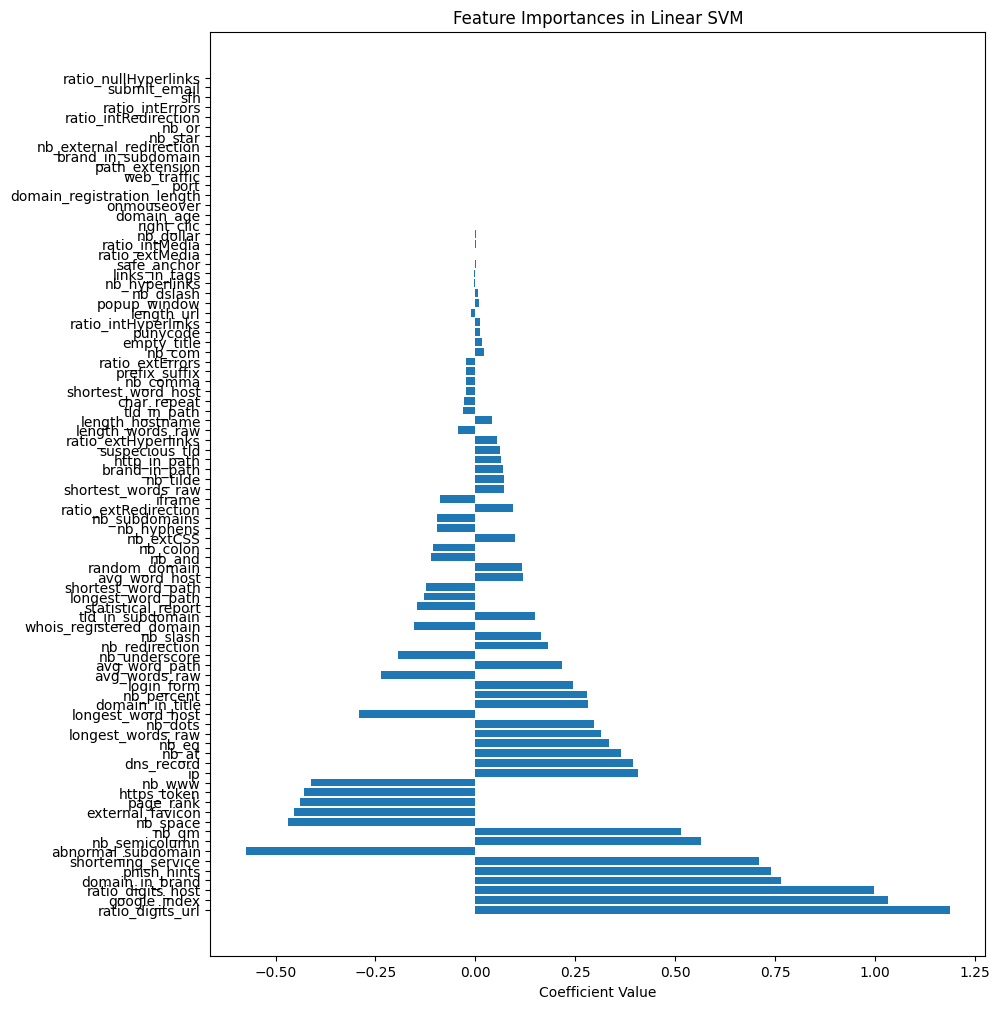

In [33]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

# Get the coefficients from the LinearSVC model
coefficients = svc_classifier.coef_[0]

# Sort the features by the absolute value of their coefficients
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_indices)), coefficients[sorted_indices])
plt.yticks(range(len(sorted_indices)), X_train.columns[sorted_indices])  # Assuming X is a DataFrame
plt.xlabel('Coefficient Value')
plt.title('Feature Importances in Linear SVM')
plt.show()

In [18]:
from sklearn.neural_network import MLPClassifier

#param_grid_svc = {'penalty': ['l1'],
 #
  #            }

mlp_classifier = MLPClassifier(random_state = 42, max_iter = 100000)
#grid_search_svc = GridSearchCV(svc_classifier, param_grid_svc, cv = 10, scoring = 'f1',
                               #return_train_score = True)

mlp_classifier.fit(X_train, y_train)

#print("Best hyperparameter combination is: ", grid_search_svc.best_params_)
#print("Best hyperparameter estimator is: ", grid_search_svc.best_estimator_)

# Scores for each hyperparameter combination
#cvres_svc = grid_search_svc.cv_results_
#for mean_score, params in zip(cvres_svc["mean_test_score"], cvres_svc["params"]):
 # print(mean_score, params)

MLPClassifier(max_iter=100000, random_state=42)

In [19]:
final_predictions_mlp = mlp_classifier.predict(X_test)

final_f1_mlp = f1_score(y_test, final_predictions_mlp)
print(final_f1_mlp)

0.8193766428839656


In [40]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(mlp_classifier, X_train, y_train, n_repeats=10, random_state=42)

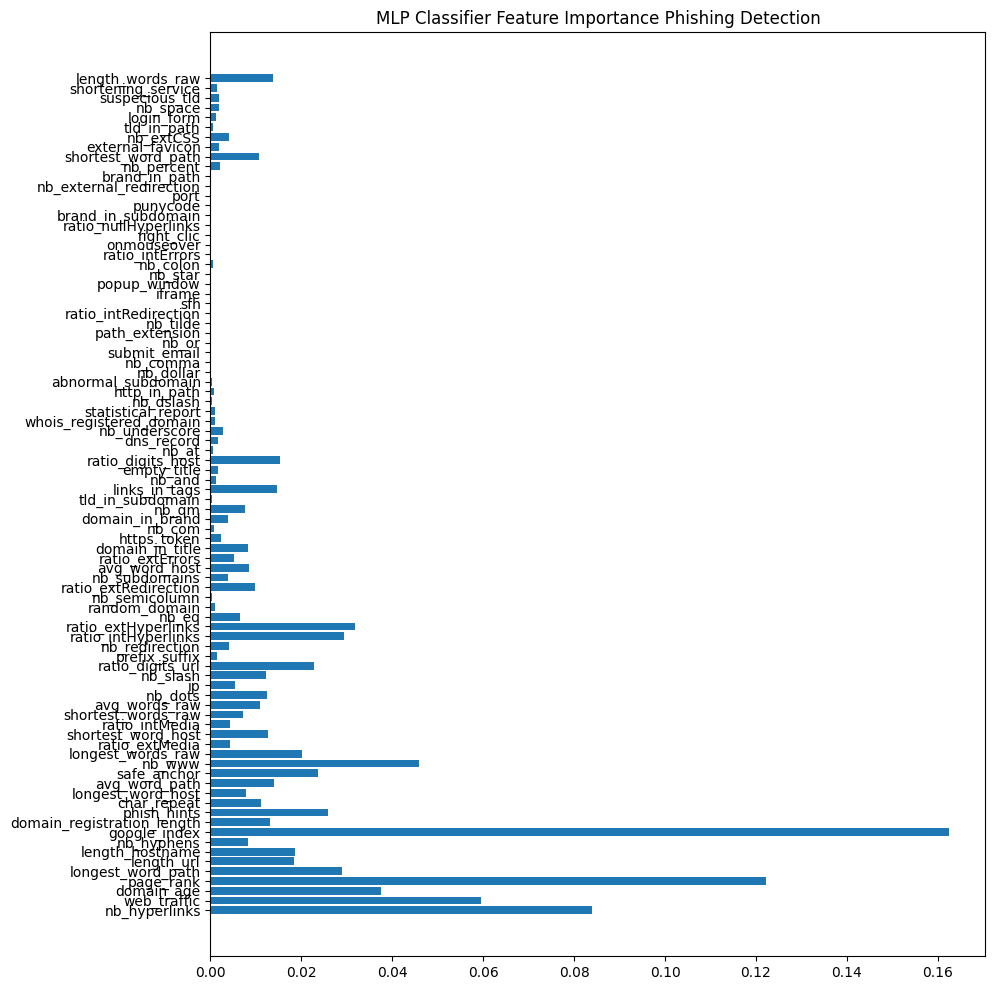

In [45]:
importances_mean = perm_importance.importances_mean
importances_std = perm_importance.importances_std

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances_mean)[::-1]

# Plot
plt.figure(figsize=(10, 12))
plt.barh(X_train.columns[sorted_indices], rf_classifier.feature_importances_[sorted_indices])
plt.title("MLP Classifier Feature Importance Phishing Detection")
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier

#param_grid_svc = {'penalty': ['l1'],
 #
  #            }

rf_classifier = RandomForestClassifier(random_state = 42)
#grid_search_svc = GridSearchCV(svc_classifier, param_grid_svc, cv = 10, scoring = 'f1',
                               #return_train_score = True)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
final_predictions_rf = rf_classifier.predict(X_test)

final_f1_rf = f1_score(y_test, final_predictions_rf)
print(final_f1_rf)

0.9814894532931554


Text(0.5, 1.0, 'Random Forest Feature Importance Phishing Detection')

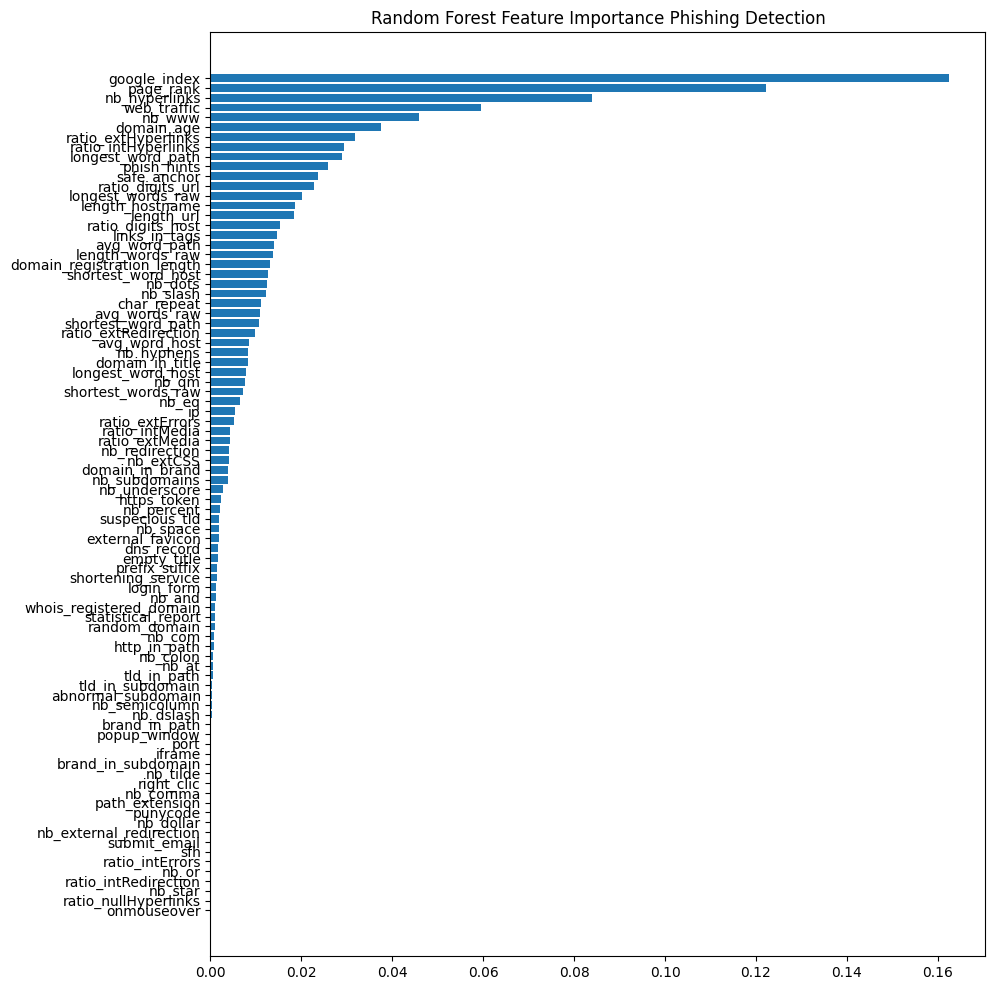

In [30]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
sort = rf_classifier.feature_importances_.argsort()

plt.figure(figsize=(10, 12))
plt.barh(X_train.columns[sort], rf_classifier.feature_importances_[sort])

plt.title("Random Forest Feature Importance Phishing Detection")

In [34]:
from numpy import loadtxt
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(random_state = 42)
#grid_search_svc = GridSearchCV(svc_classifier, param_grid_svc, cv = 10, scoring = 'f1',
                               #return_train_score = True)

xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [35]:
final_predictions_xgb = xgb_classifier.predict(X_test)

final_f1_xgb = f1_score(y_test, final_predictions_xgb)
print(final_f1_xgb)

0.9858308286818377


Text(0.5, 1.0, 'XGBoost Feature Importance Phishing Detection')

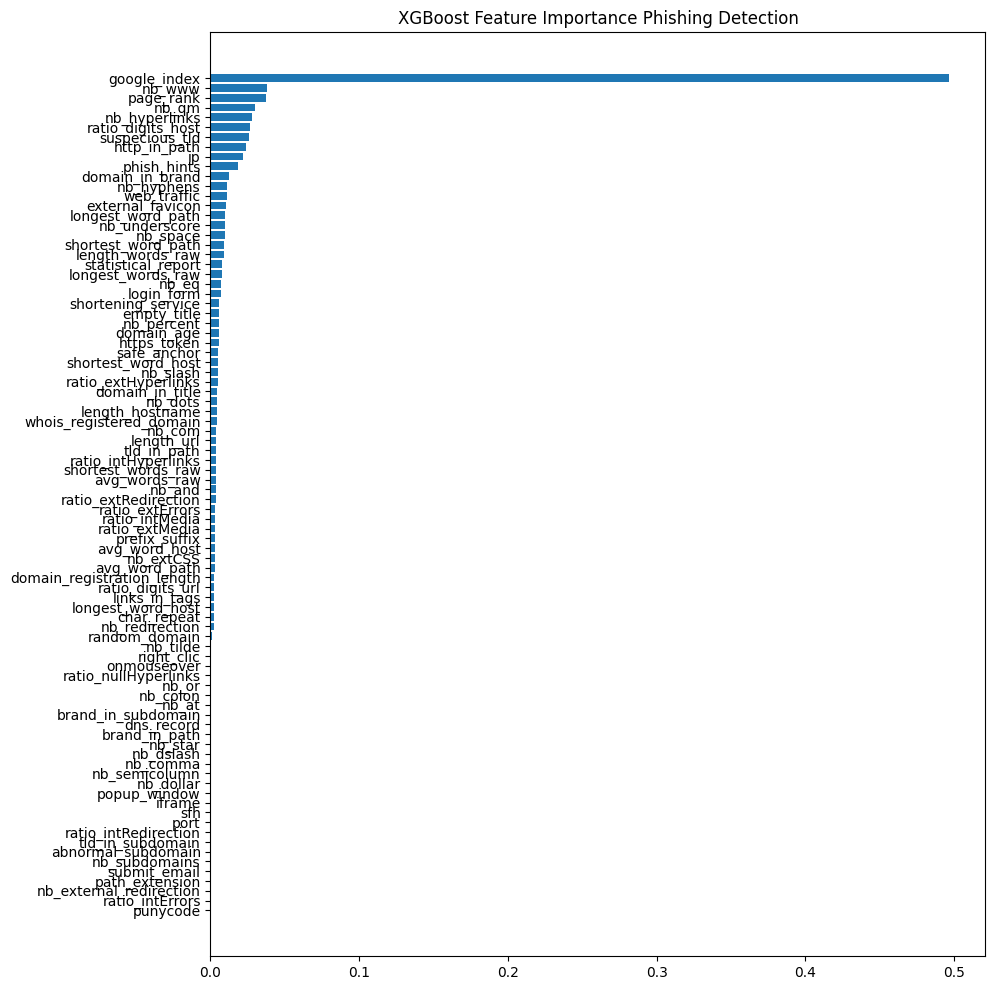

In [39]:
sort = xgb_classifier.feature_importances_.argsort()

plt.figure(figsize=(10, 12))
plt.barh(X_train.columns[sort], xgb_classifier.feature_importances_[sort])

plt.title("XGBoost Feature Importance Phishing Detection")